<a href="https://colab.research.google.com/github/hiba0903/DSA_CS_Ast/blob/main/DSA_CS_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**: Develop machine learning model to predict customer churn for a telecommunications company. The company wants to identify which customers are likely to leave (churn) and target them with retention offers. Your goal is to create a machine learning model that accurately predicts customer churn based on historical customer data.

### **Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **TRAIN DATA**

### **Loading the dATASET**

In [5]:
train=pd.read_csv('/content/Training_data.csv')

## **1. Exploratory Data Analysis (EDA) and Feature Engineering**

### **Dispaying the head rows of the data**

In [6]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


### **Displaying the summary if the data**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


### **Assuming churn as categorical variable**

In [8]:
if train['Churn'].dtype == object: #converting churn to numerical
    train['Churn'] = pd.factorize(train['Churn'])[0]

### **Dropping unnecessary features**

In [9]:
train=train.drop(['customerID','gender','TotalCharges'],axis=1)


### **Checking if any null values present**

In [10]:
train.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0
DeviceProtection,0


### **Handling the missing values**

In [11]:
# Fill missing numerical values with mean
train['MonthlyCharges'].fillna(train['MonthlyCharges'].mean(), inplace=True)

# Fill missing categorical values with mode
train['OnlineSecurity'].fillna(train['OnlineSecurity'].mode()[0], inplace=True)

train.isnull().sum()

<ipython-input-11-5965edd25d22>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MonthlyCharges'].fillna(train['MonthlyCharges'].mean(), inplace=True)
<ipython-input-11-5965edd25d22>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


### **Extracting numerical features**

In [12]:
numerical_features = train.select_dtypes(include=['number']).columns
train_numerical = train[numerical_features]

### **Creating heatmap using correlation matrix with numerical columns**

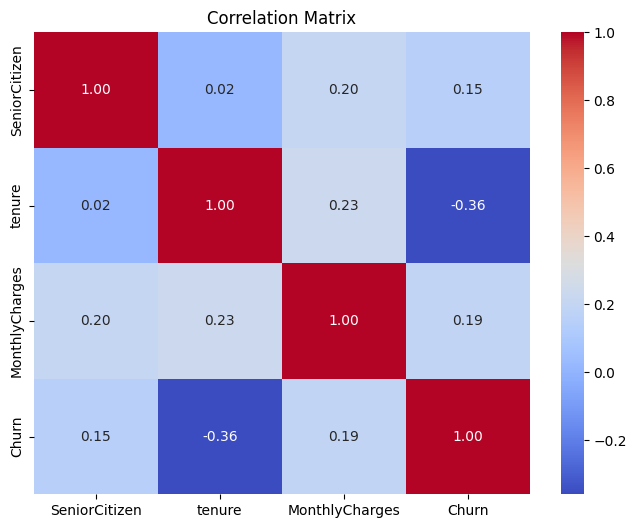

In [13]:
corr_matrix = train_numerical.corr()  # Calculate correlation

# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### **Detecting outliers**

In [14]:
outlier_col=[]
for column in train.select_dtypes(include=['number']):
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in SeniorCitizen: 900
Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in Churn: 0
['SeniorCitizen']


## **2. Data Preprocessing**

### **Converting categorical features using Label Encoder**

In [15]:
categorical_columns = train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for column in categorical_columns:
    train[column] = le.fit_transform(train[column])
train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,0,35,1,0,2,1,1,1,1,1,1,1,0,3,20.75,0
1,0,0,0,28,0,1,0,0,0,2,2,0,0,0,1,3,35.75,0
2,0,0,0,56,1,2,1,0,2,0,0,2,2,0,0,2,98.60,0
3,0,1,0,39,1,0,2,1,1,1,1,1,1,2,1,0,20.45,0
4,0,1,1,43,0,1,0,0,2,0,2,2,0,1,1,0,51.25,0


### **Feature Scaling**

In [16]:
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges']
train[numerical_features] = scaler.fit_transform(train[numerical_features])

train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,0,0.097232,1,0,2,1,1,1,1,1,1,1,0,3,-1.530243,0
1,0,0,0,-0.187173,0,1,0,0,0,2,2,0,0,0,1,3,-1.012710,0
2,0,0,0,0.950447,1,2,1,0,2,0,0,2,2,0,0,2,1.155753,0
3,0,1,0,0.259749,1,0,2,1,1,1,1,1,1,2,1,0,-1.540593,0
4,0,1,1,0.422266,0,1,0,0,2,0,2,2,0,1,1,0,-0.477926,0


In [17]:

train['OnlineSecurity'].fillna('No', inplace=True)
train['MonthlyCharges'].fillna(train['MonthlyCharges'].mean(), inplace=True)


<ipython-input-17-226a10d6346b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['OnlineSecurity'].fillna('No', inplace=True)
<ipython-input-17-226a10d6346b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# **TEST DATA**

### **Importing the test data**

In [18]:
test = pd.read_csv('/content/Testing_data.csv')

### **PreProcessing**

In [19]:
test=test.drop(['customerID','gender','TotalCharges'],axis=1)

In [20]:
test.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [21]:
categorical_columns = test.select_dtypes(include=['object']).columns
le = LabelEncoder()
for column in categorical_columns:
    test[column] = le.fit_transform(test[column])
test.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,40,1,2,1,0,0,2,0,0,0,0,1,2,81.20,0
1,0,1,0,12,1,2,0,2,0,2,0,2,2,1,0,2,78.85,0
2,0,0,0,43,1,2,1,0,0,0,2,2,2,1,1,2,100.00,1
3,0,0,0,72,1,2,1,2,2,2,2,2,2,2,1,2,118.20,0
4,0,0,0,10,0,1,0,0,2,0,2,0,0,0,0,2,36.25,0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges']
test[numerical_features] = scaler.fit_transform(test[numerical_features])

test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0.352533,1,2,1,0,0,2,0,0,0,0,1,2,0.571552,0
1,0,1,0,-0.799089,1,2,0,2,0,2,0,2,2,1,0,2,0.493922,0
2,0,0,0,0.475921,1,2,1,0,0,0,2,2,2,1,1,2,1.192589,1
3,0,0,0,1.668673,1,2,1,2,2,2,2,2,2,2,1,2,1.793806,0
4,0,0,0,-0.881348,0,1,0,0,2,0,2,0,0,0,0,2,-0.913321,0


Logistics regression model

In [23]:
if train['Churn'].dtype == object: #converting churn to numerical
    train['Churn'] = pd.factorize(train['Churn'])[0]

In [24]:
X_train = train.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y_train = train['Churn']
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on testing data: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy on testing data: 0.8126330731014905
Precision: 0.67003367003367
Recall: 0.5452054794520548
F1-score: 0.6012084592145015


### **From the evaluation it is seen that the data is trained with 81% of accuraccy**